**ProteinSequencePrediction**

Part 1: DATA

In [15]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import csv
datafile = "/content/drive/MyDrive/413_data/2022-12-17-pdb-intersect-pisces_pc25_r2.0.csv"

In [17]:
# read first 10 lines of data
data = csv.reader(open(datafile))
next(data)
for i, line in enumerate(data):
    print(line)
    if i > 10:
        break

['5D8V', 'A', 'AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANCQFMQANVGEGDWKGCQLFPGKLINVNGWCASWTLKAG', 'CCCTTBCCTTCHHHHHHTCBSSGGGSCHHHHCCTTSCGGGCCGGGBTTEEEEEEETTEEEETTSTTCBEETTCBCTTCCBCCC', 'CCCCCECCCCCHHHHHHCCECCHHHCCHHHHCCCCCCHHHCCHHHECCEEEEEEECCEEEECCCCCCEEECCCECCCCCECCC', '83', 'False', '83', 'XRAY', '0.48', '0.072', '0.078']
['3NIR', 'A', 'TTCCPSIVARSNFNVCRLPGTPEALCATYTGCIIIPGATCPGDYAN', 'CEECSSHHHHHHHHHHHTTTCCHHHHHHHHSCEECSSSCCCTTSCC', 'CEECCCHHHHHHHHHHHCCCCCHHHHHHHHCCEECCCCCCCCCCCC', '46', 'False', '46', 'XRAY', '0.48', '0.127', 'NA']
['5NW3', 'A', 'MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPKSEFEKLED', 'CCEEEETTTCCEEETTTCBGGGTBCTTCCGGGSCTTCBCTTTCCBGGGEEESCC', 'CCEEEECCCCCEEECCCCEHHHCECCCCCHHHCCCCCECCCCCCEHHHEEECCC', '54', 'False', '54', 'XRAY', '0.59', '0.135', '0.146']
['1UCS', 'A', 'NKASVVANQLIPINTALTLIMMKAEVVTPMGIPAEEIPKLVGMQVNRAVPLGTTLMPDMVKNYE', 'CCCEEEESSCBCTTCBCCGGGEEEECCSSCCSBGGGHHHHTTCBBSSCBCTTCBCCGGGBTTCC', 'CCCEEEECCCECCCCECCHHHEEEECCCCCCCEHHHHHHHCCCEECCCECCCCECCHHHE

In [18]:
data = [(seq, sst8) for  _, _, seq, sst8, _, _, _, _, _, _, _, _, in csv.reader(open(datafile))]
data = data[1:]

Tokenizing and Embedding.


In [19]:
import torch

def encode_prim_seq(sequence):
    # Define a mapping from amino acid to index
    mapping= {'A': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10,
               'M': 11, 'N': 12, 'P': 13, 'Q': 14, 'R': 15, 'S': 16, 'T': 17, 'V': 18, 'W': 19, 'Y': 20}


    return [mapping.get(aa, 0) for aa in sequence]


In [20]:
def decode_prim_seq(encoded_sequence):
    # Define a mapping from index to amino acid
    mapping= {1: 'A', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'K', 10: 'L',
               11: 'M', 12: 'N', 13: 'P', 14: 'Q', 15: 'R', 16: 'S', 17: 'T', 18: 'V', 19: 'W', 20: 'Y'}

    return ''.join([mapping.get(aa, 'X') for aa in encoded_sequence])


In [21]:

def one_hot_encode_sst8(sequence, num_classes=8):
    # Define a mapping from SST8 character to index
    mapping = {'H': 0, 'B': 1, 'E': 2, 'G': 3, 'I': 4, 'T': 5, 'S': 6, 'L': 7}

    # One-hot encode the sequence
    one_hot_encoded = []
    for aa in sequence:
        vector = [0] * num_classes
        if aa in mapping:
            vector[mapping[aa]] = 1
        one_hot_encoded.append(vector)

    return one_hot_encoded

tokenized_data = [(encode_prim_seq(seq), one_hot_encode_sst8(sst8)) for seq, sst8 in data]

# Print the first 10 entries
print(tokenized_data[:10])

[([1, 1, 13, 1, 12, 1, 18, 17, 1, 3, 3, 13, 17, 1, 8, 1, 10, 9, 20, 12, 14, 3, 1, 17, 9, 16, 4, 15, 18, 1, 1, 1, 15, 13, 6, 10, 13, 13, 4, 4, 14, 7, 2, 1, 12, 2, 14, 5, 11, 14, 1, 12, 18, 6, 4, 6, 3, 19, 9, 6, 2, 14, 10, 5, 13, 6, 9, 10, 8, 12, 18, 12, 6, 19, 2, 1, 16, 19, 17, 10, 9, 1, 6], [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0], [1, 0

In [22]:
train_data = tokenized_data[:6650]
val_data = tokenized_data[6650:7482]
test_data = tokenized_data[7482:]

In [23]:
import torch
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    """
    Returns the input and target tensors for a batch of data

    """

    seq_list = []
    target_list = []
    for (primary_seq, sst8) in batch:
        seq_list.append(torch.tensor(primary_seq))
        target_list.append(torch.tensor(sst8))

    seq = pad_sequence(seq_list, padding_value=0).transpose(0, 1)
    target = pad_sequence(target_list, padding_value=0).transpose(0, 1)
    return seq, target


train_dataloader = DataLoader(train_data, batch_size=10, shuffle=True,
                              collate_fn=collate_batch)


In [24]:
for i, (X, t) in enumerate(train_dataloader):
    print(X.shape, t.shape)
    if i >= 10:
        break

print(X,t)
print(X[0][1], t[0][1])

torch.Size([10, 519]) torch.Size([10, 519, 8])
torch.Size([10, 429]) torch.Size([10, 429, 8])
torch.Size([10, 467]) torch.Size([10, 467, 8])
torch.Size([10, 388]) torch.Size([10, 388, 8])
torch.Size([10, 531]) torch.Size([10, 531, 8])
torch.Size([10, 281]) torch.Size([10, 281, 8])
torch.Size([10, 612]) torch.Size([10, 612, 8])
torch.Size([10, 379]) torch.Size([10, 379, 8])
torch.Size([10, 379]) torch.Size([10, 379, 8])
torch.Size([10, 883]) torch.Size([10, 883, 8])
torch.Size([10, 920]) torch.Size([10, 920, 8])
tensor([[ 4, 18, 15,  ..., 10, 14, 15],
        [ 6, 16,  3,  ...,  0,  0,  0],
        [16, 16, 18,  ...,  0,  0,  0],
        ...,
        [16, 14,  6,  ...,  0,  0,  0],
        [20, 12,  3,  ...,  0,  0,  0],
        [ 1,  1,  3,  ...,  0,  0,  0]]) tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 1,  ..., 0, 0, 0],
         [0, 0, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 1,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

   

Part2: Model


In [25]:
import torch
from torch.nn import Embedding, LSTM, Linear, Dropout, ReLU, BatchNorm1d

class Model(torch.nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout_val):
    super(Model, self).__init__()

    self.hidden_dim = hidden_dim
    self.embedding_dim = embedding_dim
    self.vocab_size = vocab_size
    self.output_dim = output_dim
    self.n_layers = n_layers
    self.dropout_val = dropout_val

    super(Model, self).__init__()

    self.embedding_layer = Embedding(vocab_size, embedding_dim)
    self.LSTM_layer = LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, bidirectional=True)
    num_directions = 2 if self.LSTM_layer.bidirectional else 1

    self.fc_1 = Linear(hidden_dim*num_directions, hidden_dim)

    self.fc_2 = Linear(hidden_dim, output_dim)

    self.embedding_layer.cuda()
    self.LSTM_layer.cuda()
    self.fc_1.cuda()
    self.fc_2.cuda()



    #self.embedding_layer.requires_grad_ = True
    #self.LSTM_layer.requires_grad_ = True
    #self.fc_1.requires_grad_ = True
    #self.fc_2.requires_grad_ = True
  def forward(self, input):

    # feed input into embedding layer
    embedded = self.embedding_layer(input)

    embedded.cuda()
    # get output and hidden state from lstm layer
    num_directions = 2 if self.LSTM_layer.bidirectional else 1

    hidden_state = (torch.randn(num_directions*self.n_layers,input.size(0),self.hidden_dim).cuda(), torch.randn(num_directions*self.n_layers,input.size(0),self.hidden_dim).cuda())


    out, v = self.LSTM_layer(embedded, hidden_state)
    out.cuda()
    #print(out.grad_fn)



    #first dense layer
    out = self.fc_1(out)
    #print(out.grad_fn)


    #apply ReLU
    out = torch.nn.functional.relu(out)

    #print(out.grad_fn)


    # second dense layer
    out = self.fc_2(out)


    #out = torch.softmax(out, dim=2)
    #out.cuda()
    #print(out.grad_fn)



    return out

In [26]:
# Testing and debugging model code
vocab_size = 21
# has to be all possible sequences in the training
embedding_dim = 60
hidden_dim = 70
output_dim = 8
n_layers= 2
dropout_val = 0.1



Accuracy Function

In [27]:
def accuracy(model, data, max = 1000):
    # argmax across dim=3
    n_correct, total = 0, 0
    dataloader = DataLoader(data, batch_size=1, collate_fn=collate_batch)

    for i, (x, label) in enumerate(dataloader):
      label = label.cuda()
      x = x.cuda()

      pred = model(x)
      pred.cuda()
      # TODO: accuracy is almost 0 when we compare each character in output seq and target seq
      y = torch.argmax(pred, dim=2)
      label = torch.argmax(label, dim=2)
      # Exclude padding (assuming padding token is 0)
      mask = label != 0
      n_correct += torch.sum((y == label) * mask)
      total += torch.sum(mask)

      if i >= max:
          break

    return n_correct.float() / total if total > 0 else 0

In [28]:
model = Model(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout_val)
accuracy(model,train_data)

tensor(0.0335, device='cuda:0')

Training


In [29]:
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model(model,
                train_data,
                val_data,
                learning_rate=0.001,
                batch_size=200,
                num_epochs=20,
                plot_every=50,
                plot=True):
    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               collate_fn=collate_batch,
                                               shuffle=True)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # TODO: apply l2 regularization, only if we overfit.

    iters, train_loss, train_acc, val_acc = [], [], [], []
    iter_count = 0

    try:
        for e in range(num_epochs):
            for i, (input, labels) in enumerate(train_loader):
                input = input.cuda()
                labels = labels.cuda()
                z = model(input)
                z = z.reshape(-1, z.shape[-1])
                labels = labels.reshape(-1, labels.shape[-1])
                z = z.to(torch.float)
                # temp fix
                #z = torch.autograd.Variable(z, requires_grad=True)

                loss = criterion(z.to(torch.float), labels.to(torch.float))

                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                iter_count += 1
                if iter_count % plot_every == 0:
                    iters.append(iter_count)
                    ta = accuracy(model, train_data)
                    va = accuracy(model, val_data)
                    #print(type(ta), type(va), type(loss))
                    train_loss.append(float(loss.item()))
                    train_acc.append(ta.item())
                    val_acc.append(va.item())
                    print(iter_count, "Loss:", float(loss), "Training Accuracy", ta, "Validation Accuracy:", va)
    finally:
        if plot:
            plt.figure()
            plt.plot(iters[:len(train_loss)], train_loss)
            plt.title("Loss over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Loss")

            plt.figure()
            plt.plot(iters[:len(train_acc)], train_acc)
            plt.plot(iters[:len(val_acc)], val_acc)
            plt.title("Accuracy over iterations")
            plt.xlabel("Iterations")
            plt.ylabel("Loss")
            plt.legend(["Train", "Validation"])

50 Loss: 0.27848267555236816 Training Accuracy tensor(0.3053, device='cuda:0') Validation Accuracy: tensor(0.2855, device='cuda:0')
100 Loss: 0.2162960171699524 Training Accuracy tensor(0.4057, device='cuda:0') Validation Accuracy: tensor(0.3773, device='cuda:0')
150 Loss: 0.23559218645095825 Training Accuracy tensor(0.4593, device='cuda:0') Validation Accuracy: tensor(0.4326, device='cuda:0')
200 Loss: 0.3210901618003845 Training Accuracy tensor(0.4462, device='cuda:0') Validation Accuracy: tensor(0.4113, device='cuda:0')
250 Loss: 0.2082318365573883 Training Accuracy tensor(0.4400, device='cuda:0') Validation Accuracy: tensor(0.4043, device='cuda:0')
300 Loss: 0.29136523604393005 Training Accuracy tensor(0.4852, device='cuda:0') Validation Accuracy: tensor(0.4555, device='cuda:0')
350 Loss: 0.22326457500457764 Training Accuracy tensor(0.5056, device='cuda:0') Validation Accuracy: tensor(0.4749, device='cuda:0')
400 Loss: 0.26688727736473083 Training Accuracy tensor(0.5319, device='cu

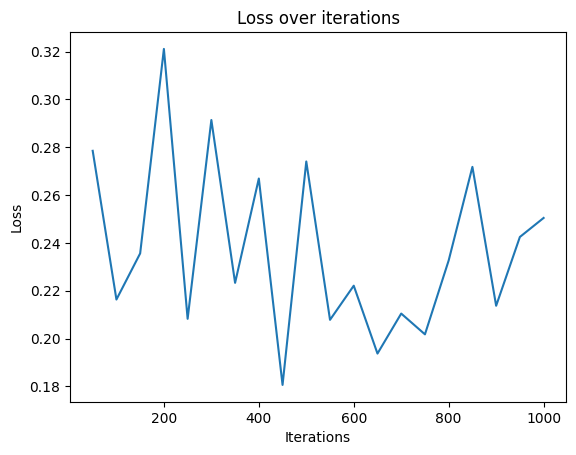

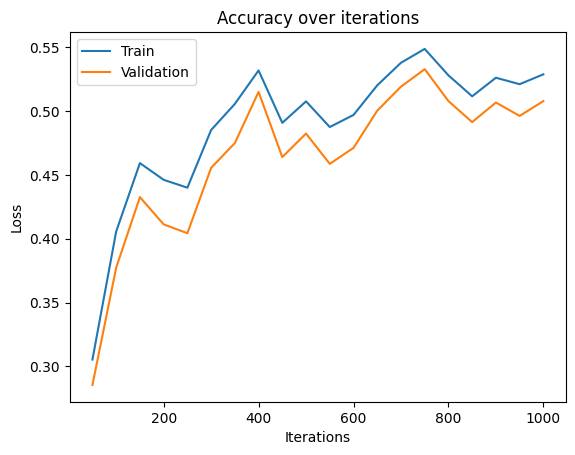

In [30]:
train_model(model,train_data, val_data, learning_rate=0.001, batch_size=200, num_epochs=30,plot_every=50)

In [31]:
accuracy(model, val_data)

tensor(0.5241, device='cuda:0')

In [32]:
dataloader = DataLoader(test_data, batch_size=1, collate_fn=collate_batch)

for i, (x, label) in enumerate(dataloader):
  label = label.cuda()
  x = x.cuda()

  pred = model(x)
  pred.cuda()
  # TODO: accuracy is almost 0 when we compare each character in output seq and target seq
  y = torch.argmax(pred, dim=2)
  label = torch.argmax(label, dim=2)
  mask = label != 0
  print(torch.sum((y == label) * mask))

  break

tensor(5, device='cuda:0')


In [ ]:
def hyperparameter_tuning(model,
                          train_data,
                          val_data,
                          learning_rates=[0.001, 0.01, 0.1],
                          batch_sizes=[10, 20, 30],
                          num_epochs=[10, 20, 30],
                          plot_every=50,
                          plot=True):

    best_model, best_accuracy, best_hyperparameters = None, 0, None

    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            for num_epoch in num_epochs:
                model = train_model(model,
                                    train_data,
                                    val_data,
                                    learning_rate=learning_rate,
                                    batch_size=batch_size,
                                    num_epochs=num_epoch,
                                    plot_every=plot_every,
                                    plot=plot)

                acc = accuracy(model, val_data)
                if acc > best_accuracy:
                    best_model = model
                    best_accuracy = acc
                    best_hyperparameters = (learning_rate, batch_size, num_epoch)

    print("Best model:", best_model)
    print("Best accuracy:", best_accuracy)
    print("Best hyperparameters:", best_hyperparameters)



In [ ]:
gridsearch = {}
for num_epoch in [10, 20, 30]:
  for batch_size in [200, 250, 300]:
      for lr in [0.01, 0.1]:

          modelname = f"num_hidden: {num_epoch}, batch_size: {batch_size}, learning_rate: {lr}"
          print(f"========={modelname}")


          train_model(model, train_data, val_data, lr, batch_size, num_epoch)
          metrics = {
              "acc_train": accuracy(model, train_data),
              "acc_val": accuracy(model, val_data),
          }
          gridsearch[modelname] = metrics
          print(f'Accuracy (train):{metrics["acc_train"]} (val):{metrics["acc_val"]}')

# num_epoch=10, batch_size = 200 and lr = 0.01 best

=========num_hidden: 10, batch_size: 200, learning_rate: 0.01
50 Loss: 0.3336218595504761 Training Accuracy tensor(0.1600) Validation Accuracy: tensor(0.1449)
100 Loss: 0.24955610930919647 Training Accuracy tensor(0.3420) Validation Accuracy: tensor(0.3203)
150 Loss: 0.3302706182003021 Training Accuracy tensor(0.3970) Validation Accuracy: tensor(0.3712)
200 Loss: 0.2877708971500397 Training Accuracy tensor(0.3990) Validation Accuracy: tensor(0.3743)
250 Loss: 0.23726403713226318 Training Accuracy tensor(0.4160) Validation Accuracy: tensor(0.3868)
300 Loss: 0.2532385289669037 Training Accuracy tensor(0.4772) Validation Accuracy: tensor(0.4601)
Accuracy (train):0.5129131078720093 (val):0.5082359313964844
=========num_hidden: 10, batch_size: 200, learning_rate: 0.1
50 Loss: 0.3534231185913086 Training Accuracy tensor(0.3284) Validation Accuracy: tensor(0.3247)
100 Loss: 0.24830062687397003 Training Accuracy tensor(0.2606) Validation Accuracy: tensor(0.2359)
150 Loss: 0.1868518739938736 Tr

In [ ]:
hyperparameter_tuning(model, train_data, val_data)

In [33]:
# model output
index_to_class = {
    0: 'H',
    1: 'B',
    2: 'E',
    3: 'G',
    4: 'I',
    5: 'T',
    6: 'S',
    7: 'L'
}



def predict_protein_sequence(model, input_sequence, encoding_function):
    # Preprocess the input sequence
    encoded_input = encoding_function(input_sequence)
    encoded_tensor = torch.tensor(encoded_input).unsqueeze(0)


    device = next(model.parameters()).device
    encoded_tensor = encoded_tensor.to(device)

    model.eval()
    with torch.no_grad():
        output_logits = model(encoded_tensor)

    # Decode the output
    #print(output_logits)
    predicted_indices = torch.argmax(output_logits, dim=2)
    predicted_sequence = [index_to_class[index.item()] for index in predicted_indices[0]]

    return ''.join(predicted_sequence)

input_sequence = 'AILLPVEGAQLSELRQIPAEGGPVLHXLRLDSPQFSQFGEIYFSEVLPRRVKAWKRHSLXTQLFAVPVGCIHVVLYDGREKSPTSGRLAQVTLGRPDNYRLLRIPPQVWYGFAATGDTPALVANCTDIPHRQGESERAPQDAPFIPFSWAGADLSGT'
predicted_seq = predict_protein_sequence(model=model, input_sequence=input_sequence, encoding_function=encode_prim_seq)
print("Predicted Sequence:", predicted_seq)


Predicted Sequence: EEEEEETTEEEEEEEEEETTTSEEEEEEEEESTTEEEEEEEEEEEEEHEEEEEEEEEEEEEEEEEEEEEEEEEEEEESEEEETTTSEEEEEEEESTTTEEEEEEETEEEEEEEETTSSHEEEEEEEESTTTTTSSSSSTTSSSEEEEEEEEEETTSS


In [34]:


for structure in val_data[-5:-1]:
  print("Input Sequence:", decode_prim_seq(structure[0]))
  predicted_seq = predict_protein_sequence(model, structure[0], encoding_function=encode_prim_seq)
  print("Predicted Sequence:", predicted_seq)
  temp = torch.as_tensor(structure[1])
  actual_indices = torch.argmax(temp, dim=1)
  actual_sequence = [index_to_class[index.item()] for index in actual_indices]
  print("Actual Sequence:", ''.join(actual_sequence))
  print()



Input Sequence: AILLPVEGAQLSELRQIPAEGGPVLHXLRLDSPQFSQFGEIYFSEVLPRRVKAWKRHSLXTQLFAVPVGCIHVVLYDGREKSPTSGRLAQVTLGRPDNYRLLRIPPQVWYGFAATGDTPALVANCTDIPHRQGESERAPQDAPFIPFSWAGADLSGT
Predicted Sequence: EEEEEEHHHHHHHHHHHHHHHHHHHTTTTTEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEHHHHHHHHHHHH
Actual Sequence: HEEHSSTTHEEEEHHEEHHTTSHEEHHHHTTHTTHHHHHEEEEEEEHBTHEEEEEEESSHHEEEEEEESEEEEEEEHHHTTHTTTTHEEEEEEETTTBHEEEEEHTTHEEEEEEHTTSHEEEEEEESSHHHTTSEEEHHTTHTTSHHHGGGHHHHHH

Input Sequence: TAAVSTRLEAEALTASSGVIKSNADASGGQYRIFNAYGVAEQIDYAVPVSHAGAYDLVLGTMRFSDNGTYQLQIDGNDVGAPVDLFRPSGKVVVVDLGSVTLSAGVHEFTFTAVGKNTSSLGYKLPLDYIQLVS
Predicted Sequence: SSEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEHHHHHHHHHEE
Actual Sequence: HHHHHEEEETTTSHBSSHEEEEHTTSGGGEEEEEHHHSTTHEEEEEEEESSHEEEEEEEEEEHHTTBHEEEEEETTEEEEEEEEHHHSSHSEEEEEEEEEEEHSEEEEEEEEEEEHHTTHSHHBEEEEEEEEEH

Input Sequenc